## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [2]:
# Load data
df = pd.read_csv("wiki-RfA.csv.gz")

# Convert date column to datetime
df["DAT"] = pd.to_datetime(df["DAT"])

# Show first five samples
df.head(5)

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no..."
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...


In [3]:
# Unique RfA are all the uniques in TGT
print(f"There are {len(df.groupby(by='TGT'))} unique RfA.")

# Verify that there are no duplicate SRC-TGT pairs
assert len(set([tuple(p) for p in df[["SRC", "TGT"]].values])) == len(df)

# Average number of votes per RfA
print(f"Each RfA has on average {df.groupby(by='TGT').size().mean():.2f} votes.")

# Alternative which aggregates unique SRC votes
# float(data.groupby(by=["TGT"]).agg({"SRC": "nunique"}).mean().iloc[0])

There are 3439 unique RfA.
Each RfA has on average 48.56 votes.


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

RfAs in 2008: 514
Fraction of positive votes in 2008: 0.76
Avg. Votes per RfA in 2008: 51.39


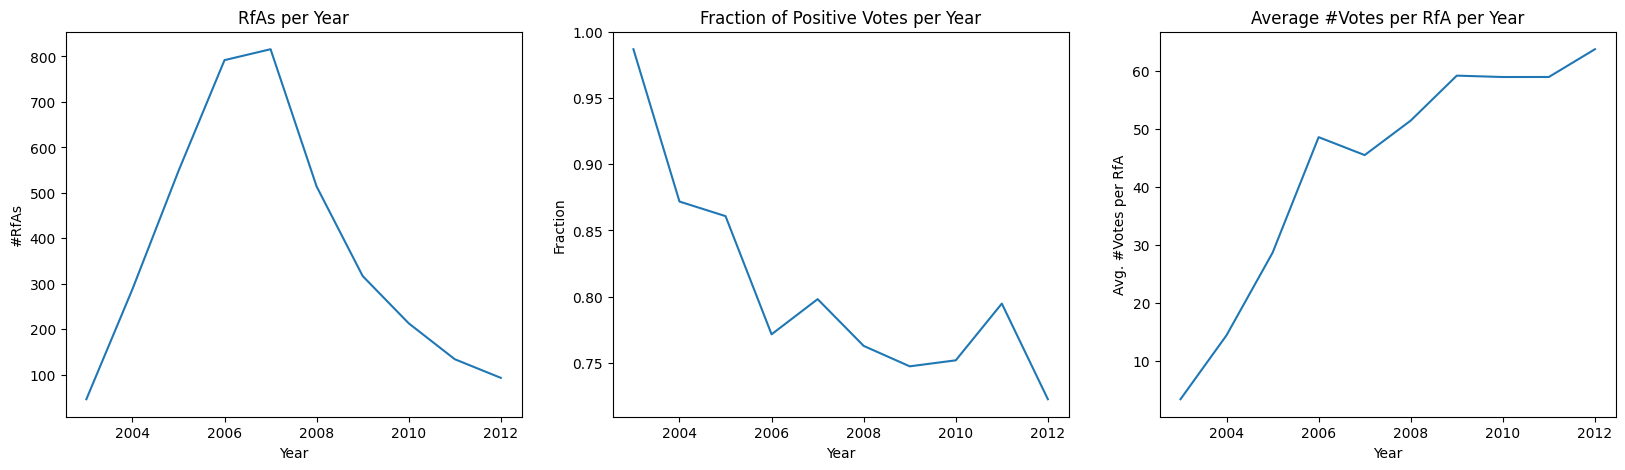

In [4]:
# Create subplots figures
fig, axs = plt.subplots(ncols=3, figsize=(20,5))

# Create relevant frames
rfas_per_year = df.groupby(by=[df["DAT"].dt.year])["TGT"].nunique().to_frame()
vote_ratio_per_year = df["VOT"].groupby(df.DAT.dt.year).value_counts(normalize=True).to_frame().reset_index().rename(columns={"proportion": "Fraction"})
pos_ratio_per_year = vote_ratio_per_year[vote_ratio_per_year["VOT"] == 1]
avg_votes_per_year = df.groupby(by=[df["DAT"].dt.year, "TGT"]).size().to_frame().groupby("DAT").mean().rename(columns={0: "Avg. #Votes per RfA"})

# Plot on axes
sns.lineplot(rfas_per_year, x="DAT", y="TGT", ax=axs[0])
sns.lineplot(pos_ratio_per_year, x="DAT", y="Fraction", ax=axs[1])
sns.lineplot(avg_votes_per_year, x="DAT", y="Avg. #Votes per RfA", ax=axs[2])

# Additional styling
axs[0].set(title="RfAs per Year", xlabel="Year", ylabel="#RfAs")
axs[1].set(title="Fraction of Positive Votes per Year", xlabel="Year")
axs[2].set(title="Average #Votes per RfA per Year", xlabel="Year")

year = 2008
print(f"RfAs in 2008: {rfas_per_year.loc[year].iloc[0]}")
print(f"Fraction of positive votes in 2008: {pos_ratio_per_year[pos_ratio_per_year['DAT'] == year]['Fraction'].values[0]:.2f}")
print(f"Avg. Votes per RfA in 2008: {avg_votes_per_year.loc[year].iloc[0]:.2f}")

**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 

We see that the number of RfAs per year increased sharply (linaerly) from 2003 to 2006 and then decrased steadily until 2012. The minimum number of RfAs are below 100 and the maximum number of RfAs was above 800 in 2007. Meanwhile the fraction of positive votes that were casted per year decreased from 2003 to 2012, with the exception of the year 2011 which had a small spike. 

In summary, we see that first a lot of people requested to be admin and then the number of requests decreased. The procedure got more selective over time, as members casted less positive votes per year. The average votes increased steadily - probably because each year there were more members to cast votes.

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [5]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

# Node and edge count
print(f"There are {len(G)} nodes in the graph.")
print(f"There are {len(G.edges())} edges in the graph.")

There are 10831 nodes in the graph.
There are 161147 edges in the graph.


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

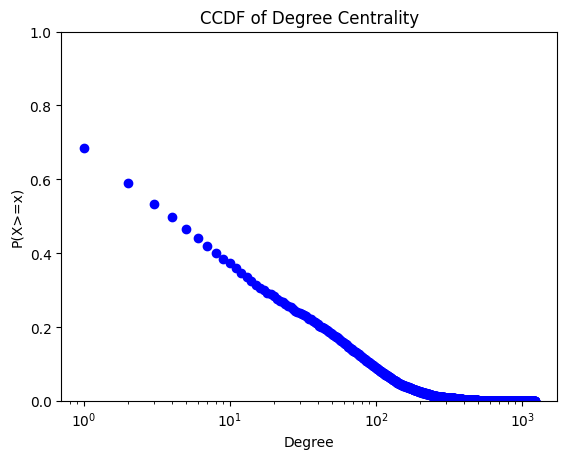

In [6]:
# CCDF of degree centrality
degrees = [d for _, d in list(G.degree())]
bincount = np.bincount(degrees)
s = float(bincount.sum())
cdf = bincount.cumsum(0)/s
ccdf = 1-cdf

fig, ax = plt.subplots()
ax.plot(range(len(ccdf)),ccdf,'bo')
ax.set(
    title="CCDF of Degree Centrality",
    xlabel="Degree",
    ylabel="P(X>=x)",
    xscale="log",
)
ax.set_ylim([0,1]);


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6** Because we have built an undirected graph and an edge may be a vote that was casted or a vote that was received. Hence, one cannot deduce the number of votes casted by a user from the degree centrality of the node in the graph.

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [8]:
# 1.7
votes_per_user = df.groupby("SRC").size()
voted_at_least_11_times = votes_per_user[votes_per_user >= 11]

print(f"The fraction of users that voted at least 11 times is {len(voted_at_least_11_times) / len(votes_per_user):.3f}")

The fraction of users that voted at least 11 times is 0.275


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [19]:
# Filter RfA graph of 2004
edges_2004 = [(src, trg) for src, trg, attr in list(G.edges(data=True)) if attr["YEA"] == 2004]
G_2004 = G.edge_subgraph(edges_2004).copy()

# Generate all cliques
triangles = []
for clique in nx.enumerate_all_cliques(G_2004):
    if len(clique) != 3:
        continue
    triangles.append(clique)

print(f"There are {len(triangles)} triangles in the graphs.")

There are 8448 triangles in the graphs.


**2.2** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2** False. The clustering coefficient is the ratio of the number of triangles that are closed out of all possible. Hence, a node with just two neighbours that are connected to each other will have a clustering coefficient of 1, but it will only belong to a single triangle. However, a node that has a lot higher degree is likely to be part of more triangles but its clustering coefficient will be lower.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [31]:
# 2.3
def is_balanced(T, col="VOT", strict: bool = False):
    assert len(T.nodes()) == 3
    assert len(T.edges()) == 3
    votes = [attr[col] for _, _, attr in list(T.edges(data=True))]
    if strict:
        return True if sum(votes) != 1 else False
    return True if sum(votes) not in [1, -3] else False

num_balanced = 0
for triangle in triangles:
    T = G_2004.subgraph(triangle)
    num_balanced += is_balanced(T)

print(f"Fraction of triangles that are 'balanced' according to structural balance theory: {num_balanced / len(triangles):.4f}")

Fraction of triangles that are 'balanced' according to structural balance theory: 0.8554


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [32]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
df_2004 = df[df.YEA == 2004].copy(deep=True)
df_2004["VOT_RND"] = np.random.choice(df_2004["VOT"].values, size=len(df_2004), replace=False)

In [34]:
# Create new edge attributes
G_2004 = nx.from_pandas_edgelist(df_2004, "SRC", "TGT", edge_attr=["VOT", "YEA", "DAT", "TXT", "VOT_RND"])

# Count balanced triangled according to strict structural balance theory
num_balanced = 0
for triangle in triangles:
    T = G_2004.subgraph(triangle)
    num_balanced += is_balanced(T, col="VOT_RND", strict=False)

print(f"Fraction of triangles that are 'balanced' according to strict structural balance theory: {num_balanced / len(triangles):.3f}")

Fraction of triangles that are 'balanced' according to strict structural balance theory: 0.720


**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** The results do suggest that the structural balance applies to the given graph as the permutation of the votes leads to a significant decrease in the number of balanced triangles. However, we would need to perform more statistical tests to quantify the uncertainty of the results.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [41]:
# 3.1
# Load additional dataframe
add_df = pd.read_csv("wiki-RfA_extra.csv.gz")

# Merge with old dataframe on SRC and TGT
merged_df = df.merge(add_df, on=["SRC", "TGT"])

# Display first three rows
merged_df.head(3)

,SRC,TGT,VOT,RES,YEA_x,DAT,TXT,YEA_y,PP,NN,PN,N,P,TXT_PROCESSED
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—,2012,2,0,4,12,0,
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no...",2012,2,1,3,11,0,this joke really isn t funny not even if you ...
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...,2012,0,0,2,10,0,as per nomination and answers


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [50]:
from sklearn.metrics import roc_auc_score

def clf1(df):
    return (df["PP"] + df["NN"] >= df["PN"]).astype(int).map({0: -1, 1: 1})

def clf2(df):
    return (df["PP"] >= df["PN"]).astype(int).map({0: -1, 1: 1})

votes1 = clf1(merged_df)
votes2 = clf2(merged_df)
targets = merged_df["VOT"]

rocauc1 = roc_auc_score(targets, votes1)
rocauc2 = roc_auc_score(targets, votes2)
print(f"ROC-AUC of classifier according to structural balance theory: {rocauc1}")
print(f"ROC-AUC of classifier according to weak structural balance theory: {rocauc2}")

ROC-AUC of classifier according to structural balance theory: 0.525390127858417
ROC-AUC of classifier according to weak structural balance theory: 0.528036104766419


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [58]:
alpha = 0.05
M = 200
N = len(merged_df)
aucroc_diffs = []
for m in range(M):
    # Construct bootstrap sample
    bootstrapped_df = merged_df.iloc[np.random.randint(N, size=N)]
    votes1 = clf1(bootstrapped_df)
    votes2 = clf2(bootstrapped_df)
    targets = bootstrapped_df["VOT"]
    aucroc_1 = roc_auc_score(targets, votes1)
    aucroc_2 = roc_auc_score(targets, votes2)
    aucroc_diffs.append(aucroc_2 - aucroc_1)

n = 200 * alpha
lo, hi = int(n//2), int(M-(n//2))
sorted_auc_roc_diffs = sorted(aucroc_diffs)
print(sorted_auc_roc_diffs[lo], sorted_auc_roc_diffs[hi])

0.002347380426158452 0.0028907883335633766


**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** Both theories are similarly good at predicting the edge signs. However, from the bootstrap results we find that the incrase in ROC-AUC score by ~0.002 weak structural balance theory is statistically significant and we are 95% that the true value is within the interval (0.0023, 0.0028).

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [81]:
# 3.5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

targets = merged_df["VOT"]
texts = merged_df["TXT_PROCESSED"].fillna("").tolist()
additional_features = merged_df[["PP", "NN", "PN", "P", "N"]]

tfidf = TfidfVectorizer(max_features=150, stop_words="english")
X = tfidf.fit_transform(texts)
y = targets
XA = np.array(np.hstack([X.todense(), additional_features.values]))

X_train, X_test, y_train, y_test = train_test_split(X, y)
XA_train, XA_test, y_train, y_test = train_test_split(XA, y)

sgd1 = SGDClassifier(loss="log_loss", max_iter=2000)
sgd2 = SGDClassifier(loss="log_loss", max_iter=2000)

sgd1.fit(X_train, y_train)
sgd2.fit(XA_train, y_train)

preds1 = sgd1.predict(X_test)
preds2 = sgd2.predict(XA_test)

rocauc1 = roc_auc_score(y_test, preds1)
rocauc2 = roc_auc_score(y_test, preds2)

rocauc1, rocauc2

(0.5, 0.7457441527027779)

**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** Yes, the analysis shows that the information from the graph helps in predicting the vote even when using the text. We would need to perform more statistical tests to quantify the uncertainty of the results.

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [84]:
# 3.7
import statsmodels.formula.api as smf

# Convert to binary outcome
merged_df["VOT2"] = (merged_df.VOT == 1).values.astype(int)

In [85]:
lm1 = smf.logit("VOT2 ~ PP + NN + PN" , data=merged_df).fit()
lm1.summary()

Optimization terminated successfully.
         Current function value: 0.514594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   VOT2   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166999
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                 0.01804
Time:                        19:57:54   Log-Likelihood:                -85939.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2781      0.006    206.255      0.000       1.266       1.290
PP             0.2493      0.007     34.272      0.000       0.235       0.264
NN            -0.6765      0.040    -16.946      0.000      -0.755      -0.598
PN            -0.5509      0.014    -40.304      0.000      -0.578      -0.524
==============================================================================
"""

In [86]:
lm2 = smf.logit("VOT2 ~ PP + NN + PN + N", data=merged_df).fit()
lm2.summary()

Optimization terminated successfully.
         Current function value: 0.487994
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   VOT2   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166998
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                 0.06880
Time:                        19:57:55   Log-Likelihood:                -81496.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6227      0.008    212.945      0.000       1.608       1.638
PP             0.2535      0.008     33.344      0.000       0.239       0.268
NN            -0.5466      0.040    -13.631      0.000      -0.625      -0.468
PN            -0.4561      0.014    -33.013      0.000      -0.483      -0.429
N             -0.0438      0.000    -89.263      0.000      -0.045      -0.043
==============================================================================
"""

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** The coefficient in the regression indicates the change in the outcome (here the probability that the vote was positive) for a one-unit additive increase in the PP feature, i.e. the number of triangles in which the two remaining edges were both positive. The coefficient is positive, which means that the probability of a positive vote increases with the number of positive triangles. This is in accordance with structural balance theory.

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  Both coefficients are smaller in the second regression model which includes the `N` predictor. It is therefore likely that `N` was previously an unobserved covariate that may have confounded the relationship between `PN` and `NN` and the outcome. This is because `N` is correlated with both `PN` and `NN` and it is also correlated with the outcome. Hence, the coefficient of `PN` and `NN` in the first regression model is biased and the second regression model is more accurate.

---